In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
cd /gdrive/My\ Drive/

/gdrive/My Drive


In [0]:
import pandas as pd
import numpy as np
import pylab as plt
import pandas as pd
from glob import glob
from astropy.io import fits
from astropy.table import Table
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten , BatchNormalization , ReLU
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as K

Using TensorFlow backend.


In [0]:
def conf_plotter(y_true, y_pred, classes,
                      normalize=0,
                      title=None,
                      cmap=plt.cm.pink_r,
                      mode = 'train',
                      save = 0,
                      name = 'conf.jpg'):

    if not title:
        if mode == 'train':
            title = 'Normalized confusion matrix on train dataset'
        else:
            title = 'Normalized confusion matrix on test dataset'
            

    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax ,fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           xlabel='Predicted label',
           ylabel='True label')
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
                    
        item.set_fontsize(20)
     
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        
        item.set_fontsize(12)

        
                
    plt.gca().invert_yaxis()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if save == 1:
        plt.savefig(name)
    return ax

In [0]:
data = pd.read_csv('./daFeatures_train2.csv')

In [0]:
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,object_id,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,flux_err_min,flux_err_max,flux_err_mean,flux_err_median,flux_err_std,flux_err_skew,detected_mean,flux_ratio_sq_sum,flux_ratio_sq_skew,flux_by_flux_ratio_sq_sum,flux_by_flux_ratio_sq_skew,flux_w_mean,flux_diff1,flux_diff2,flux_diff3,"0__fft_coefficient__coeff_0__attr_""abs""","0__fft_coefficient__coeff_1__attr_""abs""",0__kurtosis,0__skewness,"1__fft_coefficient__coeff_0__attr_""abs""","1__fft_coefficient__coeff_1__attr_""abs""",1__kurtosis,1__skewness,"2__fft_coefficient__coeff_0__attr_""abs""","2__fft_coefficient__coeff_1__attr_""abs""",2__kurtosis,2__skewness,"3__fft_coefficient__coeff_0__attr_""abs""","3__fft_coefficient__coeff_1__attr_""abs""",3__kurtosis,3__skewness,"4__fft_coefficient__coeff_0__attr_""abs""",...,__freq_signif_ratio_21___3_,__freq_signif_ratio_21___4_,__freq_signif_ratio_21___5_,__freq_signif_ratio_31___0_,__freq_signif_ratio_31___1_,__freq_signif_ratio_31___2_,__freq_signif_ratio_31___3_,__freq_signif_ratio_31___4_,__freq_signif_ratio_31___5_,__freq_varrat___0_,__freq_varrat___1_,__freq_varrat___2_,__freq_varrat___3_,__freq_varrat___4_,__freq_varrat___5_,__freq_y_offset___0_,__freq_y_offset___1_,__freq_y_offset___2_,__freq_y_offset___3_,__freq_y_offset___4_,__freq_y_offset___5_,time_score,phase_score,ddf_bool,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,-1100.440063,660.626343,-123.096998,-89.477524,394.109851,-0.349540,2.130510,12.845472,4.482743,3.835269,1.744747,1.623740,0.946023,2.929669e+06,0.812722,-9.601766e+08,-1.414322,-327.742307,1761.066406,-14.306331,-5.373326,205.036926,1628.427737,-1.475181,0.128917,22370.594834,2806.374162,-1.255123,0.415580,7780.500807,2805.598113,-1.409885,0.339918,7024.003068,2536.068846,-1.449858,0.293128,3245.366349,...,0.919127,0.936241,0.980085,0.750430,0.798199,0.734428,0.731502,0.628905,0.915124,0.127550,0.269031,0.139362,0.110785,0.129578,0.401664,4.173310,-29.908400,18.747900,17.090800,20.412000,12.103300,0.197098,0.934001,1,92,1,0.000,0.000,0.000,0.0,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,1,713,-14.735178,14.770886,-1.423351,-0.873033,6.471144,0.014989,0.639458,9.115748,2.359620,1.998217,1.509888,1.633246,0.171429,5.886068e+03,3.439423,-2.875087e+04,-3.454554,-4.884564,29.506064,-20.730002,-6.040676,190.427851,299.586559,-1.014003,0.260052,57.109047,192.539229,-1.097170,-0.087865,44.477327,191.057528,-1.188472,-0.022678,55.270113,212.522263,-1.142896,-0.167176,50.414646,...,0.911566,0.942109,0.914162,0.834175,0.880634,0.801262,0.745575,0.866079,0.908687,0.113341,0.076214,0.086381,0.111883,0.166179,0.369518,0.535781,-0.255908,0.167986,0.680787,-0.218376,0.177517,0.778523,-0.130853,1,88,1,1.817,45.703,0.000,0.0,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,2,730,-19.159811,47.310059,2.267434,0.409172,8.022239,3.177854,0.695106,11.281384,2.471061,1.990851,1.721134,1.823726,0.069697,4.124452e+03,5.480405,1.046502e+05,5.989138,25.373110,66.469870,29.315018,2.619697,3.461790,4.729538,0.474215,0.356910,7.334944,13.515895,0.976374,0.471342,124.845250,119.500254,5.131290,2.385066,168.280524,162.799417,7.125665,2.662075,219.745132,...,0.947548,1.026690,0.959602,0.969243,0.903630,0.820510,0.868992,0.920047,0.935167,0.758565,0.657343,0.204607,0.292954,0.318256,0.500549,-0.003923,0.211586,4.263530,5.710620,5.226490,-0.328019,0.481251,0.419737,1,42,2,0.233,40.328,0.004,4.5,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,3,745,-15.494463,220.795212,8.909206,1.035895,27.558208,4.979826,0.567170,55.892746,2.555576,1.819875,3.537324,10.741655,0.173789,9.416165e+04,9.611274,1.439125e+07,11.141069,152.835617,236.289675,26.521968,1.546038,129.421659,123.298327,4.629801,2.023211,320.174052,280.440312,50.868880,7.007099,543.845781,491.548270,36.088137,5.688194,807.123762,710.721942,16.392533,3.751603,735.528417,...,0.626753,0.787122,0.706331,0.6029

In [0]:
df.columns.get_loc("target")

67

In [0]:
df.columns.get_loc("true_target")

356

In [0]:
# df = df.sample(frac=1)
# df.head(2)

In [0]:
df.iloc[:1]

,Unnamed: 0,object_id,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,flux_err_min,flux_err_max,flux_err_mean,flux_err_median,flux_err_std,flux_err_skew,detected_mean,flux_ratio_sq_sum,flux_ratio_sq_skew,flux_by_flux_ratio_sq_sum,flux_by_flux_ratio_sq_skew,flux_w_mean,flux_diff1,flux_diff2,flux_diff3,"0__fft_coefficient__coeff_0__attr_""abs""","0__fft_coefficient__coeff_1__attr_""abs""",0__kurtosis,0__skewness,"1__fft_coefficient__coeff_0__attr_""abs""","1__fft_coefficient__coeff_1__attr_""abs""",1__kurtosis,1__skewness,"2__fft_coefficient__coeff_0__attr_""abs""","2__fft_coefficient__coeff_1__attr_""abs""",2__kurtosis,2__skewness,"3__fft_coefficient__coeff_0__attr_""abs""","3__fft_coefficient__coeff_1__attr_""abs""",3__kurtosis,3__skewness,"4__fft_coefficient__coeff_0__attr_""abs""",...,__freq_signif_ratio_21___3_,__freq_signif_ratio_21___4_,__freq_signif_ratio_21___5_,__freq_signif_ratio_31___0_,__freq_signif_ratio_31___1_,__freq_signif_ratio_31___2_,__freq_signif_ratio_31___3_,__freq_signif_ratio_31___4_,__freq_signif_ratio_31___5_,__freq_varrat___0_,__freq_varrat___1_,__freq_varrat___2_,__freq_varrat___3_,__freq_varrat___4_,__freq_varrat___5_,__freq_y_offset___0_,__freq_y_offset___1_,__freq_y_offset___2_,__freq_y_offset___3_,__freq_y_offset___4_,__freq_y_offset___5_,time_score,phase_score,ddf_bool,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,-1100.440063,660.626343,-123.096998,-89.477524,394.109851,-0.34954,2.13051,12.845472,4.482743,3.835269,1.744747,1.62374,0.946023,2.929669e+06,0.812722,-9.601766e+08,-1.414322,-327.742307,1761.066406,-14.306331,-5.373326,205.036926,1628.427737,-1.475181,0.128917,22370.594834,2806.374162,-1.255123,0.41558,7780.500807,2805.598113,-1.409885,0.339918,7024.003068,2536.068846,-1.449858,0.293128,3245.366349,...,0.919127,0.936241,0.980085,0.75043,0.798199,0.734428,0.731502,0.628905,0.915124,0.12755,0.269031,0.139362,0.110785,0.129578,0.401664,4.17331,-29.9084,18.7479,17.0908,20.412,12.1033,0.197098,0.934001,1,92,1,0.0,0.0,0.0,0.0,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0


In [0]:
df_ =np.nan_to_num(df)

In [0]:
np.any(np.isinf(df_))

False

In [0]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_)
df_ = pd.DataFrame(x_scaled)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [0]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371
0,0.000000,0.000000e+00,0.998599,0.000580,0.253477,0.582881,0.001400,0.398073,0.005095,1.692928e-06,0.000022,0.000540,0.000002,0.231565,0.945714,0.269740,0.102732,0.419864,0.457157,0.279084,0.000486,0.522296,0.539588,0.000092,3.515728e-04,0.023115,0.486666,0.035217,0.006315,0.048923,0.520752,0.002080,0.001155,0.016812,0.522493,0.002151,0.001181,0.011624,0.514756,0.000885,...,0.631785,0.597880,0.626320,0.418006,0.337524,0.424850,0.434345,0.278001,0.539139,0.127557,0.268992,0.139321,0.110750,0.129510,0.401857,0.273375,0.396428,0.999929,0.496892,0.609820,0.492746,0.437672,0.959545,1.0,0.966292,0.0,0.000000,0.000000,0.793282,0.481390,0.0,0.0,0.453353,0.00138,0.016690,0.020350,0.017798,0.020112,0.017101,0.015200
1,0.000127,7.493545e-07,0.999543,0.000315,0.254123,0.584075,0.000014,0.409715,0.000537,2.344565e-08,0.000002,0.000063,0.000001,0.232165,0.166694,0.000530,0.234246,0.423389,0.402260,0.280379,0.000002,0.522246,0.539480,0.000085,6.464922e-05,0.029284,0.494760,0.000090,0.000433,0.051468,0.487141,0.000012,0.000079,0.020477,0.498674,0.000017,0.000099,0.016752,0.484139,0.000014,...,0.624041,0.604519,0.530395,0.464654,0.392311,0.484569,0.449170,0.554486,0.529920,0.113348,0.076164,0.086336,0.111848,0.166125,0.369672,0.228406,0.476676,0.999922,0.463559,0.552805,0.438561,0.851534,0.182289,1.0,0.921348,0.0,0.527737,0.964483,0.793282,0.481390,0.0,0.0,0.453353,0.00068,0.003743,0.000729,0.000664,0.000990,0.000886,0.000806
2,0.000255,8.793446e-07,0.999539,0.000328,0.254143,0.584092,0.000019,0.510730,0.000707,9.928179e-07,0.000003,0.000061,0.000002,0.244197,0.064381,0.000368,0.336435,0.423389,0.656362,0.280500,0.000013,0.522639,0.540883,0.000002,9.836503e-07,0.049192,0.500738,0.000012,0.000030,0.084877,0.524475,0.000033,0.000049,0.125095,0.656837,0.000052,0.000075,0.154875,0.672325,0.000060,...,0.660896,0.700214,0.596515,0.539890,0.407594,0.501768,0.579188,0.617399,0.567847,0.758609,0.657327,0.204572,0.292940,0.318262,0.500862,0.221734,0.477941,0.999924,0.473776,0.567853,0.436264,0.639934,0.584175,1.0,0.404494,0.5,0.067674,0.851053,0.803618,0.483366,0.0,0.0,0.747074,0.00018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000382,9.940417e-07,0.999542,0.000400,0.254178,0.584101,0.000089,0.568282,0.000316,2.096156e-05,0.000003,0.000017,0.000007,0.807492,0.169068,0.008658,0.543261,0.423442,0.794985,0.281012,0.000060,0.522617,0.540709,0.000058,2.658504e-05,0.104780,0.603580,0.000504,0.000631,0.888741,0.960817,0.000145,0.000202,0.637555,0.873816,0.000247,0.000331,0.309674,0.744794,0.000201,...,0.332318,0.429168,0.227978,0.335878,0.280169,0.165986,0.242775,0.393860,0.239087,0.432172,0.793641,0.472483,0.290638,0.360891,0.489889,0.210280,0.476894,0.999923,0.471281,0.575672,0.456745,0.645143,0.567762,1.0,0.943820,0.0,0.087424,0.864580,0.782946,0.594496,0.0,0.0,0.641620,0.00076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000510,3.892056e-06,0.999541,0.000368,0.254169,0.584102,0.000062,0.549964,0.000708,1.038612e-06,0.000005,0.000119,0.000003,0.242378,0.168571,0.003149,0.456001,0.423400,0.707997,0.280751,0.000039,0.522585,0.540754,0.000019,7.085033e-06,0.053851,0.458209,0.000423,0.000467,0.167627,0.651716,0.000159,0.000205,0.211374,0.702187,0.000197,0.000258,0.271309,0.734923,0.000157,...,0.275762,0.237176,0.609899,0.553325,0.214116,0.310929,0.245203,0.286970,0.656955,0.559305,0.122120,0.147008,0.250620,0.382879,0.674116,0.221512,0.499461,0.999930,0.505696,0.595852,0.452834,0.717472,0.695442,1.0,0.943820,0.0,0.056056,0.841303,0.788114,0.319522,0.0,0.0,0.749849,0.00002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
df.iloc[:3]

,Unnamed: 0,object_id,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,flux_err_min,flux_err_max,flux_err_mean,flux_err_median,flux_err_std,flux_err_skew,detected_mean,flux_ratio_sq_sum,flux_ratio_sq_skew,flux_by_flux_ratio_sq_sum,flux_by_flux_ratio_sq_skew,flux_w_mean,flux_diff1,flux_diff2,flux_diff3,"0__fft_coefficient__coeff_0__attr_""abs""","0__fft_coefficient__coeff_1__attr_""abs""",0__kurtosis,0__skewness,"1__fft_coefficient__coeff_0__attr_""abs""","1__fft_coefficient__coeff_1__attr_""abs""",1__kurtosis,1__skewness,"2__fft_coefficient__coeff_0__attr_""abs""","2__fft_coefficient__coeff_1__attr_""abs""",2__kurtosis,2__skewness,"3__fft_coefficient__coeff_0__attr_""abs""","3__fft_coefficient__coeff_1__attr_""abs""",3__kurtosis,3__skewness,"4__fft_coefficient__coeff_0__attr_""abs""",...,__freq_signif_ratio_21___3_,__freq_signif_ratio_21___4_,__freq_signif_ratio_21___5_,__freq_signif_ratio_31___0_,__freq_signif_ratio_31___1_,__freq_signif_ratio_31___2_,__freq_signif_ratio_31___3_,__freq_signif_ratio_31___4_,__freq_signif_ratio_31___5_,__freq_varrat___0_,__freq_varrat___1_,__freq_varrat___2_,__freq_varrat___3_,__freq_varrat___4_,__freq_varrat___5_,__freq_y_offset___0_,__freq_y_offset___1_,__freq_y_offset___2_,__freq_y_offset___3_,__freq_y_offset___4_,__freq_y_offset___5_,time_score,phase_score,ddf_bool,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,-1100.440063,660.626343,-123.096998,-89.477524,394.109851,-0.349540,2.130510,12.845472,4.482743,3.835269,1.744747,1.623740,0.946023,2.929669e+06,0.812722,-9.601766e+08,-1.414322,-327.742307,1761.066406,-14.306331,-5.373326,205.036926,1628.427737,-1.475181,0.128917,22370.594834,2806.374162,-1.255123,0.415580,7780.500807,2805.598113,-1.409885,0.339918,7024.003068,2536.068846,-1.449858,0.293128,3245.366349,...,0.919127,0.936241,0.980085,0.750430,0.798199,0.734428,0.731502,0.628905,0.915124,0.127550,0.269031,0.139362,0.110785,0.129578,0.401664,4.173310,-29.908400,18.747900,17.090800,20.412000,12.103300,0.197098,0.934001,1,92,1,0.000,0.000,0.000,0.0,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,1,713,-14.735178,14.770886,-1.423351,-0.873033,6.471144,0.014989,0.639458,9.115748,2.359620,1.998217,1.509888,1.633246,0.171429,5.886068e+03,3.439423,-2.875087e+04,-3.454554,-4.884564,29.506064,-20.730002,-6.040676,190.427851,299.586559,-1.014003,0.260052,57.109047,192.539229,-1.097170,-0.087865,44.477327,191.057528,-1.188472,-0.022678,55.270113,212.522263,-1.142896,-0.167176,50.414646,...,0.911566,0.942109,0.914162,0.834175,0.880634,0.801262,0.745575,0.866079,0.908687,0.113341,0.076214,0.086381,0.111883,0.166179,0.369518,0.535781,-0.255908,0.167986,0.680787,-0.218376,0.177517,0.778523,-0.130853,1,88,1,1.817,45.703,0.000,0.0,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,2,730,-19.159811,47.310059,2.267434,0.409172,8.022239,3.177854,0.695106,11.281384,2.471061,1.990851,1.721134,1.823726,0.069697,4.124452e+03,5.480405,1.046502e+05,5.989138,25.373110,66.469870,29.315018,2.619697,3.461790,4.729538,0.474215,0.356910,7.334944,13.515895,0.976374,0.471342,124.845250,119.500254,5.131290,2.385066,168.280524,162.799417,7.125665,2.662075,219.745132,...,0.947548,1.026690,0.959602,0.969243,0.903630,0.820510,0.868992,0.920047,0.935167,0.758565,0.657343,0.204607,0.292954,0.318256,0.500549,-0.003923,0.211586,4.263530,5.710620,5.226490,-0.328019,0.481251,0.419737,1,42,2,0.233,40.328,0.004,4.5,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
targets = df['target']
classes = targets.unique()
classes

array([92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53])

In [0]:
targets[:5]

0    92
1    88
2    42
3    90
4    90
Name: target, dtype: int64

In [0]:
class_map =[] 

for i,val in enumerate(classes):
    class_map.append([val , i])
class_map

[[92, 0],
 [88, 1],
 [42, 2],
 [90, 3],
 [65, 4],
 [16, 5],
 [67, 6],
 [95, 7],
 [62, 8],
 [15, 9],
 [52, 10],
 [6, 11],
 [64, 12],
 [53, 13]]

In [0]:
[class_map[i][0] for i in range(len(class_map))]

[92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52, 6, 64, 53]

In [0]:
len(class_map)

14

In [0]:
def one_hot(targets , class_map):
    
    vecs = []
    
    for j in targets:
        
        vec = np.zeros((classes.shape[0],))
        
        for i in range(len(class_map)):
            if class_map[i][0]== j:
                vec[class_map[i][1]] =+ 1
                vecs.append(vec)
    return vecs

In [0]:
one_hot(targets , class_map=class_map)[:5]

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [0]:
def remove_structure(x):
    return np.array(x)

In [0]:
# n_train = 3*df.shape[0]//4

# X_train = df_.iloc[:n_train].drop([356, 67] ,1)
# y_train = one_hot(targets , class_map=class_map)[:n_train]
# # y_train = df['vectors'][:n_train]

# X_test = df_.iloc[n_train:].drop([356, 67] ,1)
# # y_test = df['vectors'][n_train:]
# y_test = one_hot(targets , class_map=class_map)[n_train:]


# X_train = remove_structure(X_train)
# X_test = remove_structure(X_test)
# y_train = remove_structure(y_train)
# y_test = remove_structure(y_test)

# input_dim = X_train.shape[1]
# input_dim

In [0]:
df.shape

(7848, 372)

In [0]:
X = df_.drop([356, 67] ,1)
y = one_hot(targets , class_map=class_map)

X = remove_structure(X)
y = remove_structure(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
input_dim = X_train.shape[1]
input_dim

370

In [0]:
y_train.shape

(5886, 14)

In [0]:
X_train.shape

(5886, 370)

In [0]:
n_class = len(classes)
n_class

14

In [0]:
af = 'relu'

K.backend.clear_session()
model = Sequential()

model.add(Dense(input_dim, input_dim=input_dim))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))

model.add(Dense(256))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.3))

model.add(Dense(128))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))

model.add(Dense(128))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))

model.add(Dense(64))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))

model.add(Dense(64))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.3))

model.add(Dense(32))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))

model.add(Dense(32))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))

model.add(Dense(n_class, activation='softmax'))

W0816 16:25:35.023186 139932106307456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0816 16:25:35.025567 139932106307456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0816 16:25:35.052879 139932106307456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 16:25:35.055164 139932106307456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W081

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 370)               137270    
_________________________________________________________________
batch_normalization_1 (Batch (None, 370)               1480      
_________________________________________________________________
activation_1 (Activation)    (None, 370)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               94976     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

In [0]:
#sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = K.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-3, amsgrad=False)

In [0]:
model.compile(loss = K.losses.categorical_crossentropy, optimizer=adam)

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=200,verbose=1)

Epoch 1/100
5886/5886 [==============================] - 3s 463us/step - loss: 3.1458
Epoch 2/100
5886/5886 [==============================] - 1s 119us/step - loss: 3.0199
Epoch 3/100
5886/5886 [==============================] - 1s 128us/step - loss: 2.9788
Epoch 4/100
5886/5886 [==============================] - 1s 121us/step - loss: 2.8708
Epoch 5/100
5886/5886 [==============================] - 1s 120us/step - loss: 2.7875
Epoch 6/100
5886/5886 [==============================] - 1s 125us/step - loss: 2.7126
Epoch 7/100
5886/5886 [==============================] - 1s 117us/step - loss: 2.6270
Epoch 8/100
5886/5886 [==============================] - 1s 127us/step - loss: 2.5386
Epoch 9/100
5886/5886 [==============================] - 1s 125us/step - loss: 2.5048
Epoch 10/100
5886/5886 [==============================] - 1s 122us/step - loss: 2.4667
Epoch 11/100
5886/5886 [==============================] - 1s 126us/step - loss: 2.4196
Epoch 12/100
5886/5886 [============================

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=1)

Epoch 1/100
5886/5886 [==============================] - 0s 81us/step - loss: 1.4519
Epoch 2/100
5886/5886 [==============================] - 0s 80us/step - loss: 1.4480
Epoch 3/100
5886/5886 [==============================] - 1s 89us/step - loss: 1.4352
Epoch 4/100
5886/5886 [==============================] - 0s 83us/step - loss: 1.4405
Epoch 5/100
5886/5886 [==============================] - 0s 77us/step - loss: 1.4486
Epoch 6/100
5886/5886 [==============================] - 0s 81us/step - loss: 1.4318
Epoch 7/100
5886/5886 [==============================] - 1s 85us/step - loss: 1.4405
Epoch 8/100
5886/5886 [==============================] - 0s 81us/step - loss: 1.4317
Epoch 9/100
5886/5886 [==============================] - 1s 89us/step - loss: 1.4269
Epoch 10/100
5886/5886 [==============================] - 0s 81us/step - loss: 1.4303
Epoch 11/100
5886/5886 [==============================] - 0s 84us/step - loss: 1.4131
Epoch 12/100
5886/5886 [==============================] - 1s 85

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=1)

Epoch 1/100
5886/5886 [==============================] - 0s 77us/step - loss: 1.2332
Epoch 2/100
5886/5886 [==============================] - 0s 77us/step - loss: 1.2354
Epoch 3/100
5886/5886 [==============================] - 0s 77us/step - loss: 1.2082
Epoch 4/100
5886/5886 [==============================] - 0s 78us/step - loss: 1.2322
Epoch 5/100
5886/5886 [==============================] - 0s 78us/step - loss: 1.2196
Epoch 6/100
5886/5886 [==============================] - 0s 80us/step - loss: 1.2189
Epoch 7/100
5886/5886 [==============================] - 1s 87us/step - loss: 1.2198
Epoch 8/100
5886/5886 [==============================] - 0s 82us/step - loss: 1.2333
Epoch 9/100
5886/5886 [==============================] - 1s 86us/step - loss: 1.2125
Epoch 10/100
5886/5886 [==============================] - 0s 84us/step - loss: 1.2099
Epoch 11/100
5886/5886 [==============================] - 1s 87us/step - loss: 1.2147
Epoch 12/100
5886/5886 [==============================] - 0s 80

In [0]:
# evaluate the model
model.evaluate(X_train, y_train, verbose=1)

5886/5886 [==============================] - 1s 152us/step


0.7860306589084136

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=1)

Epoch 1/100
5886/5886 [==============================] - 0s 84us/step - loss: 1.0543
Epoch 2/100
5886/5886 [==============================] - 0s 80us/step - loss: 1.0648
Epoch 3/100
5886/5886 [==============================] - 0s 84us/step - loss: 1.0635
Epoch 4/100
5886/5886 [==============================] - 0s 79us/step - loss: 1.0480
Epoch 5/100
5886/5886 [==============================] - 0s 85us/step - loss: 1.0639
Epoch 6/100
5886/5886 [==============================] - 0s 80us/step - loss: 1.0495
Epoch 7/100
5886/5886 [==============================] - 0s 82us/step - loss: 1.0709
Epoch 8/100
5886/5886 [==============================] - 0s 82us/step - loss: 1.0562
Epoch 9/100
5886/5886 [==============================] - 0s 82us/step - loss: 1.0645
Epoch 10/100
5886/5886 [==============================] - 0s 80us/step - loss: 1.0529
Epoch 11/100
5886/5886 [==============================] - 0s 82us/step - loss: 1.0413
Epoch 12/100
5886/5886 [==============================] - 0s 84

In [0]:
# evaluate the model
model.evaluate(X_train, y_train, verbose=1)

5886/5886 [==============================] - 1s 105us/step


0.14993418873146283

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=400,verbose=1)

Epoch 1/100
5886/5886 [==============================] - 0s 65us/step - loss: 0.3553
Epoch 2/100
5886/5886 [==============================] - 0s 61us/step - loss: 0.3612
Epoch 3/100
5886/5886 [==============================] - 0s 65us/step - loss: 0.3606
Epoch 4/100
5886/5886 [==============================] - 0s 59us/step - loss: 0.3552
Epoch 5/100
5886/5886 [==============================] - 0s 60us/step - loss: 0.3569
Epoch 6/100
5886/5886 [==============================] - 0s 67us/step - loss: 0.3600
Epoch 7/100
5886/5886 [==============================] - 0s 64us/step - loss: 0.3564
Epoch 8/100
5886/5886 [==============================] - 0s 66us/step - loss: 0.3607
Epoch 9/100
5886/5886 [==============================] - 0s 66us/step - loss: 0.3553
Epoch 10/100
5886/5886 [==============================] - 0s 70us/step - loss: 0.3569
Epoch 11/100
5886/5886 [==============================] - 0s 66us/step - loss: 0.3591
Epoch 12/100
5886/5886 [==============================] - 0s 64

In [0]:
path = './NN_models/3'
# serialize model to JSON
model_json = model.to_json()
with open(str(path)+'/model.json', "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights(str(path)+'/model.h5')
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json

# load json and create model
json_file = open('./NN_models/3/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./NN_models/3/model.h5")
print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

W0816 16:26:53.884556 139837236975488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 16:26:53.901741 139837236975488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 16:26:53.994660 139837236975488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 16:26:53.996046 139837236975488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0816 16:26:54.139410

Loaded model from disk


In [0]:
predicts = model.predict(X_test)

Y = []
pr= []

for i in range(len(y_test)):
    
    pr.append(idxmax(predicts[i]))
    
    Y.append(np.argmax(y_test[i]))


labels = [class_map[i][0] for i in range(len(class_map))]  
    
conf_plotter(Y , pr , labels , normalize=1, mode='test' , cmap = plt.cm.YlGn, save=0 , name='test_3.jpg')

NameError: ignored

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y, pr)
np.trace(cm)/len(y_test)

NameError: ignored

In [0]:
print(predicts.shape)
print(np.array(Y).shape)
print(np.array(pr).shape)
print(y_test.shape)

(1962, 14)
(1962,)
(1962,)
(1962, 14)


In [0]:
y_true = pd.DataFrame(y_test)
y_preds = pd.DataFrame(predicts)

In [0]:
def multi_weighted_logloss(y_true, y_preds):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    classes = targets.unique()
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    
    
    y_p = y_preds
    
    y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1-1e-15)
    # Transform to log
    y_p_log = np.log(y_p)

    
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).values.astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos
    
    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss

# s = 0 
# for i in range(len(y_test)):
#     s += multi_weighted_logloss( Y[i] , pr[i] )
# s/len(y_test)

multi_weighted_logloss(y_true, y_preds)

1.2603242689698757

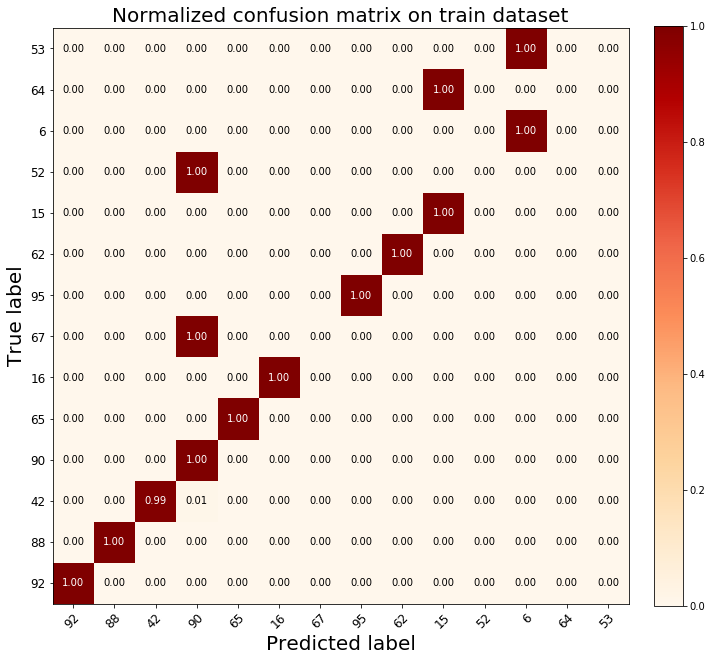

In [0]:
predicts = model.predict(X_train)

Y = []
pr= []

for i in range(len(y_train)):
    
    pr.append(np.argmax(predicts[i]))
    Y.append(np.argmax(y_train[i]))


labels = [class_map[i][0] for i in range(len(class_map))]   
    
conf_plotter(Y , pr , labels , normalize=1, cmap = plt.cm.OrRd, save=1 , name='train_3.jpg')